In [1]:
import mib_v2_3 as mb2_3
from itertools import product
import time
wn = 50
 
n_vocab = 58

time_Q_TAW_nv = []

for i in [13,14,15]:
    time_Q_TAW = []

    A = mb2_3.Var('A', set([j for j in range(10)]))
    T = mb2_3.Var('T', set([0,1,2]))
    W = [mb2_3.Var(j, set([0,1])) for j in range(i)]
    
    print("n_vocab: ",i)
    dA = {}
    for j in range(10):
        dA[(j,)] = 1/10
        
    PA = mb2_3.Distrib(set([A]), dA, ('A'))
    
    
    dT_A = {}
    for j in range(10):
        dT_A[(j,)] = {}
        for k in range(3):
            dT_A[(j,)][(k,)] = 1/10
        
    PT_A = mb2_3.CondDistrib(set([T]), set([A]),dT_A, ('T',), ('A'))
    
    PW_AT = []
    for wi in W:
        dwi_TA = {}
        for par in product(*[[0,1,2], [j for j in range(10)]]):
            dwi_TA[par] = {}
            for j in range(2):
                dwi_TA[par][(j,)] = 0.5

        PWi_AT = mb2_3.CondDistrib(set([wi]), set([T,A]), dwi_TA, (wi.getName(),), ('T','A'))
        PW_AT.append(PWi_AT)
    
    set_vars = set([A,T] + W)
    set_descomp = set([PA, PT_A,] + PW_AT)
    PATW = mb2_3.Specification(set_vars,set_descomp)
    
    QW_AT = mb2_3.Question(PATW)
    
    for j in range(i):
        Wt = [W[k-1] for k in range(j+1)]
        Wt_v = [1 for k in range(j+1)]
        
        inicio = time.time()
        CA, VA, p = QW_AT.Query(vars=(A,), indep=tuple(Wt), values_indep=tuple(Wt_v))
        fin = time.time()
        print("n_w:",j,"-",fin - inicio)
        time_Q_TAW.append(fin - inicio)
    
    time_Q_TAW_nv.append(time_Q_TAW)

n_vocab:  13
n_w: 0 - 1.627624750137329
n_w: 1 - 0.8100185394287109
n_w: 2 - 0.40247058868408203
n_w: 3 - 0.20111870765686035
n_w: 4 - 0.10146236419677734
n_w: 5 - 0.05058693885803223
n_w: 6 - 0.02527594566345215
n_w: 7 - 0.012704133987426758
n_w: 8 - 0.0062541961669921875
n_w: 9 - 0.0032758712768554688
n_w: 10 - 0.0018000602722167969
n_w: 11 - 0.0008597373962402344
n_w: 12 - 0.0004787445068359375
n_vocab:  14
n_w: 0 - 3.456160068511963
n_w: 1 - 1.730130910873413
n_w: 2 - 0.8645391464233398
n_w: 3 - 0.4306657314300537
n_w: 4 - 0.21652007102966309
n_w: 5 - 0.10798001289367676
n_w: 6 - 0.05413961410522461
n_w: 7 - 0.02703690528869629
n_w: 8 - 0.013629436492919922
n_w: 9 - 0.0067827701568603516
n_w: 10 - 0.003711700439453125
n_w: 11 - 0.0018079280853271484
n_w: 12 - 0.0009224414825439453
n_w: 13 - 0.0005078315734863281
n_vocab:  15
n_w: 0 - 7.3218371868133545
n_w: 1 - 3.6688239574432373
n_w: 2 - 1.8277103900909424
n_w: 3 - 0.9177653789520264
n_w: 4 - 0.4592776298522949
n_w: 5 - 0.22943258

In [2]:
import mib_v2_3_mp  as mb2_3tr
from itertools import product
import time
wn = 50
 
n_vocab = 58

time_Q_TAW_nv_thr = []

for i in [13,14,15]:
    time_Q_TAW = []

    A = mb2_3tr.Var('A', set([j for j in range(10)]))
    T = mb2_3tr.Var('T', set([0,1,2]))
    W = [mb2_3tr.Var(j, set([0,1])) for j in range(i)]
    
    print("n_vocab: ",i)
    dA = {}
    for j in range(10):
        dA[(j,)] = 1/10
        
    PA = mb2_3tr.Distrib(set([A]), dA, ('A'))
    
    
    dT_A = {}
    for j in range(10):
        dT_A[(j,)] = {}
        for k in range(3):
            dT_A[(j,)][(k,)] = 1/10
        
    PT_A = mb2_3tr.CondDistrib(set([T]), set([A]),dT_A, ('T',), ('A'))
    
    PW_AT = []
    for wi in W:
        dwi_TA = {}
        for par in product(*[[0,1,2], [j for j in range(10)]]):
            dwi_TA[par] = {}
            for j in range(2):
                dwi_TA[par][(j,)] = 0.5

        PWi_AT = mb2_3tr.CondDistrib(set([wi]), set([T,A]), dwi_TA, (wi.getName(),), ('T','A'))
        PW_AT.append(PWi_AT)
    
    set_vars = set([A,T] + W)
    set_descomp = set([PA, PT_A,] + PW_AT)
    PATW = mb2_3tr.Specification(set_vars,set_descomp)
    
    QW_AT = mb2_3tr.Question(PATW)
    
    for j in range(i):
        Wt = [W[k-1] for k in range(j+1)]
        Wt_v = [1 for k in range(j+1)]
        
        inicio = time.time()
        CA, VA, p = QW_AT.Query(vars=(A,), indep=tuple(Wt), values_indep=tuple(Wt_v))
        fin = time.time()
        print("n_w:",j,"-",fin - inicio)
        time_Q_TAW.append(fin - inicio)
    
    time_Q_TAW_nv_thr.append(time_Q_TAW)

n_vocab:  13
n_w: 0 - 0.6761250495910645
n_w: 1 - 0.2801513671875
n_w: 2 - 0.2272205352783203
n_w: 3 - 0.18165969848632812
n_w: 4 - 0.15264248847961426
n_w: 5 - 0.09572386741638184
n_w: 6 - 0.06679725646972656
n_w: 7 - 0.05168414115905762
n_w: 8 - 0.041452646255493164
n_w: 9 - 0.05399012565612793
n_w: 10 - 0.056894779205322266
n_w: 11 - 0.04084420204162598
n_w: 12 - 0.03704357147216797
n_vocab:  14
n_w: 0 - 1.1220943927764893
n_w: 1 - 0.5635778903961182
n_w: 2 - 0.2935798168182373
n_w: 3 - 0.22710633277893066
n_w: 4 - 0.18492555618286133
n_w: 5 - 0.15182161331176758
n_w: 6 - 0.09303164482116699
n_w: 7 - 0.06361126899719238
n_w: 8 - 0.053873538970947266
n_w: 9 - 0.04830598831176758
n_w: 10 - 0.0415804386138916
n_w: 11 - 0.04045391082763672
n_w: 12 - 0.035446882247924805
n_w: 13 - 0.03503918647766113
n_vocab:  15
n_w: 0 - 2.292271137237549
n_w: 1 - 1.2721285820007324
n_w: 2 - 0.639892578125
n_w: 3 - 0.309873104095459
n_w: 4 - 0.2378404140472412
n_w: 5 - 0.1982715129852295
n_w: 6 - 0.1633

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


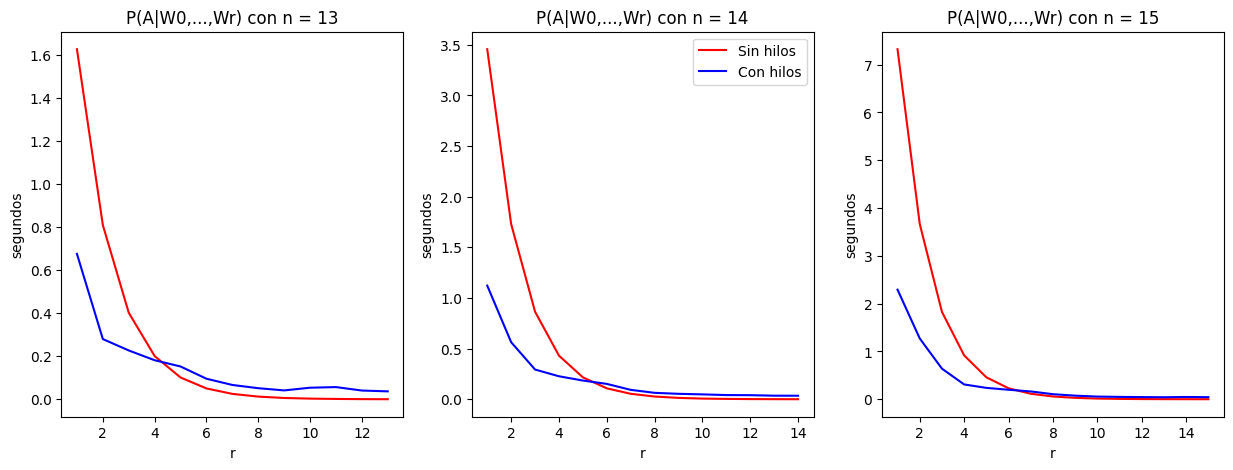

In [3]:
import matplotlib.pyplot as plt
nc = 1
nf = 3
fig, axs = plt.subplots(nc, nf)
fig.set_size_inches(15,5)

for i in range(len(time_Q_TAW_nv)):
    xn = [k+1 for k in range(len(time_Q_TAW_nv[i]))]
    
    axs[i].plot(xn, time_Q_TAW_nv[i], color='r', label='Sin hilos')
    axs[i].plot(xn, time_Q_TAW_nv_thr[i], color='b', label='Con hilos')
    
    axs[i].set_title("P(A|W0,...,Wr) con n = {n}".format(n = len(time_Q_TAW_nv[i])))
    axs[i].set_xlabel("r")
    axs[i].set_ylabel("segundos")
    axs[1].legend()
    